## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:

# Importing some useful packages

from importlib import reload

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import sys
import os

sys.path.append("../../") # go to parent dir

# Visualizations will be shown in the notebook:

%matplotlib inline


# Import local deps

# import src.helpers.lineRegressorWithMemory as LRM
# import src.helpers.imageProcessing as IP
# import src.helpers.plot as P
import src.helpers.cameraCalibration as C

if 'src.helpers.cameraCalibration' in sys.modules:
    print("Reloading Modules...")
    
    reload(C)
    
    print("\nModules Reloaded!")

Reloading Modules...

Modules Reloaded!


# Camera calibration

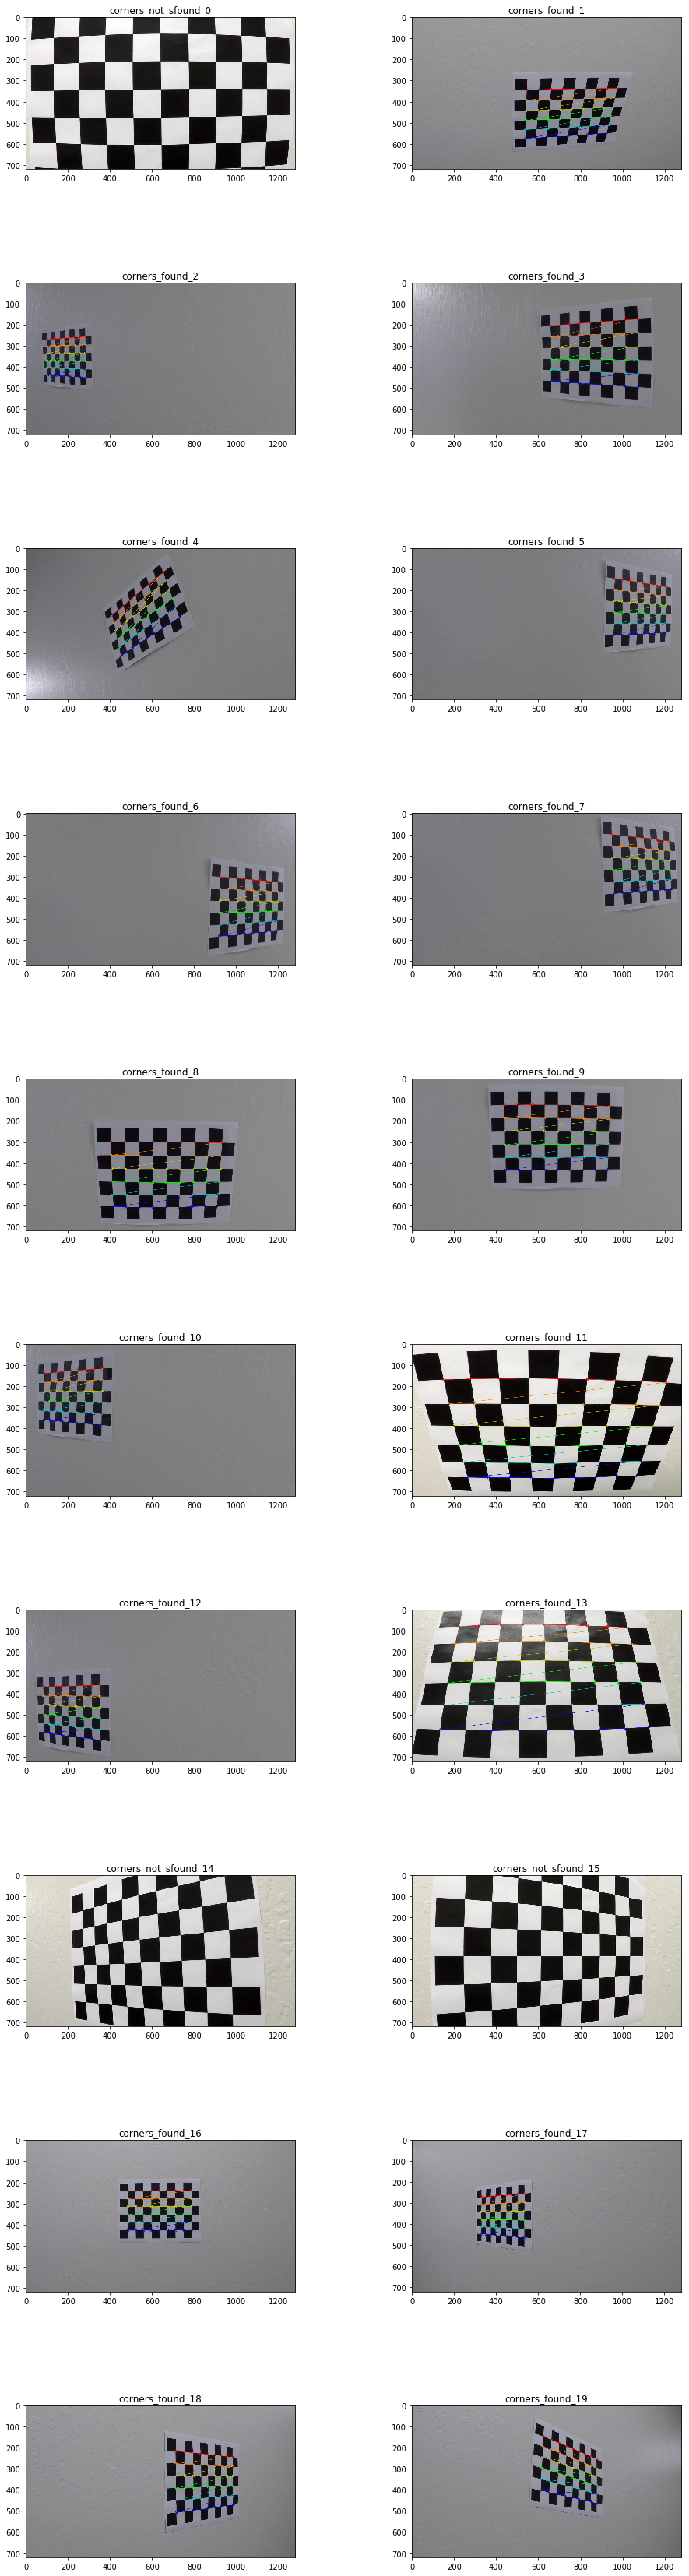

In [3]:
# Get corners:
obj_points, img_points = C.findChessboardCorners('../../input/images/camera-calibration/*.jpg')

# Load example image:
img = cv2.imread('../../input/images/camera-calibration/calibration1.jpg')

# BGR to RGB:
img = img[:,:,::-1]

# Get images size:
size = (img.shape[1], img.shape[0])

# Calculate mtx and dist:
mtx, dist = C.calibrate_camera(obj_points, img_points, size, '../../output/data/calibration.p')


# Undistorted image example

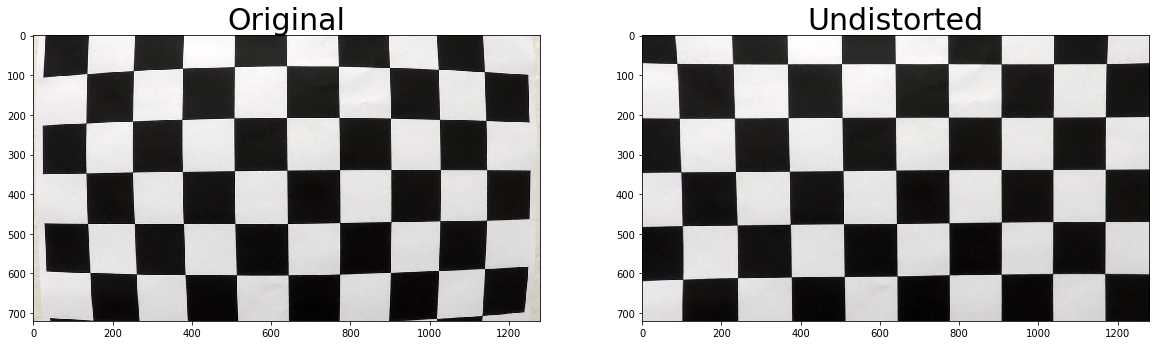

In [4]:
# Undistort image:
undistorted = C.undistort(img, mtx, dist)

# Visualize undistortion GoPro
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(img)
ax1.set_title('Original', fontsize=30)

ax2.imshow(undistorted)
ax2.set_title('Undistorted', fontsize=30)
